In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

## Logistic Growth

$$ \frac{d y}{d t} = k \bigg(1 - \frac{y}{L} \bigg) y $$

$$ y(t) = \frac{L}{2} + \frac{L}{2}\tanh\bigg(\frac{k}{2}(t - t_0)\bigg) $$

$$ y'(t) = \frac{L k}{4} \mathrm{sech}^2\bigg(\frac{k}{2}(t - t_0)\bigg) $$ 

In [2]:
t = sp.Symbol('t')
t0 = sp.Symbol('t_0')
y = sp.Function('y')(t)
y_prime = sp.Function("y'")(t)
k = sp.Symbol('k')
L = sp.Symbol('L')

diff_eqn = sp.Eq(sp.diff(y, t), k*(1 - y/L)*y)
display(diff_eqn)

sol = L/2*(1 + sp.tanh(k*(t - t0)/2))
sol_eqn = sp.Eq(y, sol)
display(sol_eqn)

display(diff_eqn.subs(y, sol).simplify())

sol_prime = sp.diff(sol, t).simplify()
sol_prime_eqn = sp.Eq(y_prime, sol_prime)
display(sol_prime_eqn)

Eq(Derivative(y(t), t), k*(1 - y(t)/L)*y(t))

Eq(y(t), L*(tanh(k*(t - t_0)/2) + 1)/2)

True

Eq(y'(t), L*k/(4*cosh(k*(t - t_0)/2)**2))

## Covid Data

In [3]:
tidy_world = pd.read_csv('world_covid.csv', parse_dates=['date'])
tidy_us = pd.read_csv('us_covid.csv', parse_dates=['date'])

pivot_world = pd.pivot_table(
    tidy_world,
    index='date',
    columns='name',
    values=['cases', 'deaths'],
    aggfunc='sum')

pivot_us = pd.pivot_table(
    tidy_us,
    index='date',
    columns='name',
    values=['cases', 'deaths'],
    aggfunc='sum')

pivot_world.index.name = None
pivot_us.index.name = None

new_cases_world = pivot_world['cases'].diff()
new_cases_us = pivot_us['cases'].diff()

new_deaths_world = pivot_world['deaths'].diff()
new_deaths_us = pivot_us['deaths'].diff()

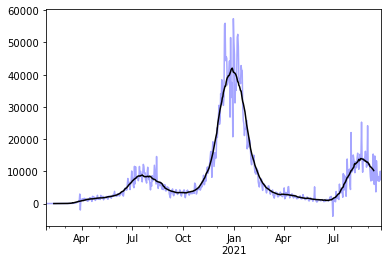

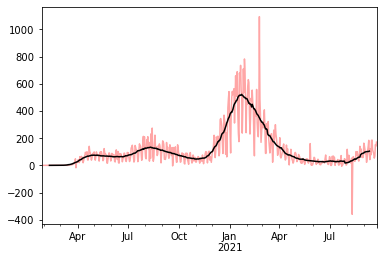

In [4]:
state = 'Hawaii'
#state = 'Washington'
#state = 'Iowa'
state = 'California'
#state = 'New York'


C1 = new_cases_us[state].dropna()
D1 = new_deaths_us[state].dropna()
C2 = C1.rolling(28, center=True).mean()
D2 = D1.rolling(28, center=True).mean()

C1.plot(color='blue', alpha=0.35); C2.plot(color='black'); plt.show();
D1.plot(color='red',  alpha=0.35); D2.plot(color='black'); plt.show();

## Fit Covid Data With Logistic Growth

In [17]:
def sech(x):
    x_max = 100
    logic = (-x_max < x) & (x < x_max)
    y = np.zeros(len(x))
    y[logic] = 1/np.cosh(x[logic])
    return y


def func(x, a, b, c): 
    y = a*sech(b*x - c)**2
    return y


def fit(x, y, a0, b0, c0):
    popt, pcov = curve_fit(func, x, y, p0=[a0, b0, c0])
    a, b, c = popt
    return a, b, c


def to_abc(k, L, x0): return L*k/4, k/2, k/2*x0
def to_kLx0(a, b, c): return 2*b, 2*a/b, c/b


def fit(x, y, k_init, L_init, x0_init):
    a_init, b_init, c_init = to_abc(k_init, L_init, x0_init)
    popt, pcov = curve_fit(fit_func, x, y, p0=[a_init, b_init, c_init])
    a, b, c = popt
     k, L, x0 = to_kLx0(a, b, c)
    return k, L, x0




IndentationError: unexpected indent (<ipython-input-17-c1aec4dd2cbf>, line 29)

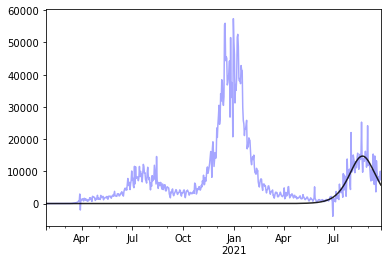

In [9]:
series = C1

t = series.index
y = series.values
x = np.arange(len(t))
x_norm = x/x.max()
y_norm = y/y.max()
popt1, pcov1 = curve_fit(func, x_norm[-100:], y_norm[-100:])
series_fit = pd.Series(index=t, data=y.max()*func(x_norm, *popt1))

series.plot(color='blue', alpha=0.35);
series_fit.plot(color='black', alpha=0.85);

In [ ]:
series = new_deaths_us['Hawaii'].dropna()
series_rolling = series.rolling(28, center=True).mean()

t = series.index
y = series.values
x = np.arange(len(t))
x_norm = x/x.max()/10000
y_norm = y/y.max()/10000
popt1, pcov1 = curve_fit(func, x_norm[-50:], y_norm[-50:])
series_fit = pd.Series(index=t, data=10000*y.max()*func(x_norm, *popt1))

series.plot(color='red', alpha=0.35);
series_fit.plot(color='black', alpha=0.85);